In [1]:
import numpy as np
import pandas as pd 
import chardet
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
csv_path = "//Users//rishabkhuba//Desktop//UML Project//HydroWASTE_v10.csv"

with open(csv_path, 'r', encoding='utf-8', errors='ignore') as file:
    content = file.readlines()

headers = content[0].strip().split(',') 
# Split each line into a list, remove leading/trailing whitespace, and remove newline characters
data = [line.strip().split(',') for line in content[1:]]

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)

# Display the DataFrame to verify
df.head()

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.21,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2


In [3]:
print(df.shape)

(58502, 25)


In [4]:
print(df.columns)

Index(['WASTE_ID', 'SOURCE', 'ORG_ID', 'WWTP_NAME', 'COUNTRY', 'CNTRY_ISO',
       'LAT_WWTP', 'LON_WWTP', 'QUAL_LOC', 'LAT_OUT', 'LON_OUT', 'STATUS',
       'POP_SERVED', 'QUAL_POP', 'WASTE_DIS', 'QUAL_WASTE', 'LEVEL',
       'QUAL_LEVEL', 'DF', 'HYRIV_ID', 'RIVER_DIS', 'COAST_10KM', 'COAST_50KM',
       'DESIGN_CAP', 'QUAL_CAP'],
      dtype='object')


In [5]:
df.isna().sum()
# No NULL values

WASTE_ID      0
SOURCE        0
ORG_ID        0
WWTP_NAME     0
COUNTRY       0
CNTRY_ISO     0
LAT_WWTP      0
LON_WWTP      0
QUAL_LOC      0
LAT_OUT       0
LON_OUT       0
STATUS        0
POP_SERVED    0
QUAL_POP      0
WASTE_DIS     0
QUAL_WASTE    0
LEVEL         0
QUAL_LEVEL    0
DF            0
HYRIV_ID      0
RIVER_DIS     0
COAST_10KM    0
COAST_50KM    0
DESIGN_CAP    0
QUAL_CAP      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.rename(columns={'SOURCE': 'SOURCE_ID'}, inplace=True)

In [8]:
df.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.21,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58502 entries, 0 to 58501
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WASTE_ID    58502 non-null  object
 1   SOURCE_ID   58502 non-null  object
 2   ORG_ID      58502 non-null  object
 3   WWTP_NAME   58502 non-null  object
 4   COUNTRY     58502 non-null  object
 5   CNTRY_ISO   58502 non-null  object
 6   LAT_WWTP    58502 non-null  object
 7   LON_WWTP    58502 non-null  object
 8   QUAL_LOC    58502 non-null  object
 9   LAT_OUT     58502 non-null  object
 10  LON_OUT     58502 non-null  object
 11  STATUS      58502 non-null  object
 12  POP_SERVED  58502 non-null  object
 13  QUAL_POP    58502 non-null  object
 14  WASTE_DIS   58502 non-null  object
 15  QUAL_WASTE  58502 non-null  object
 16  LEVEL       58502 non-null  object
 17  QUAL_LEVEL  58502 non-null  object
 18  DF          58502 non-null  object
 19  HYRIV_ID    58502 non-null  object
 20  RIVER_

In [10]:
df.describe()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
count,58502,58502,58502,58502,58502,58502,58502,58502,58502,58502,...,58502,58502,58502,58502,58502,58502,58502,58502,58502,58502
unique,58502,12,47496,49261,188,180,31311,44467,4,13507,...,4,3,2,45200,42822,22018,2,2,7329,3
top,1,1,184,,United States,USA,-3.13,-59.912,2,-3.131,...,1,Secondary,1,,,,0,0,,2
freq,1,24971,9,5287,14819,14819,75,75,44991,75,...,33792,34766,47315,11200,379,10551,48057,39091,15835,24715


In [11]:
df["WWTP_NAME"].unique()

array(['Akmenes aglomeracija', 'Alytaus m aglomeracija',
       'Anyksciu aglomeracija', ..., 'La Escalerilla', 'Punta de Bombon',
       ''], dtype=object)

In [12]:
len(df["WWTP_NAME"].unique())

49261

In [13]:
df["COUNTRY"].unique()

array(['Lithuania', 'Russia', 'Estonia', 'Netherlands', 'Slovakia',
       'Germany', 'Finland', 'Finland (Aland)', 'Switzerland', 'France',
       'Italy', 'Bulgaria', 'Slovenia', 'Croatia', 'Malta', 'Cyprus',
       'Poland', 'Ukraine', 'Czech Republic', 'Ireland', 'United Kingdom',
       'Spain', 'Morocco', 'Latvia', 'Denmark', 'Hungary', 'Portugal',
       'Romania', 'Greece', 'Turkey', 'Luxembourg', 'Belgium', 'Norway',
       'Iceland', 'France (Martinique)', 'France (Guadeloupe)',
       'Saint-Martin', 'Monaco', 'French Guiana',
       'Bosnia and Herzegovina', 'Austria', 'Sweden', 'United States',
       'Brazil', 'Mexico', 'China', 'Canada', 'Australia', 'South Africa',
       'India', 'New Zealand', 'Peru', 'Argentina', 'Chile', 'Uruguay',
       'Paraguay', 'Bolivia', 'Ecuador', 'Colombia',
       'New Zealand (Cook Islands)', 'Tonga', 'French Polynesia',
       'American Samoa', 'Lesotho', 'Namibia', 'Swaziland', 'Mozambique',
       'Madagascar', 'Botswana', 'New Caledon

In [14]:
len(df["COUNTRY"].unique())

188

In [15]:
df[df["COUNTRY"] == "India"]

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
51898,51899,9,1,Rajamundry EG district,India,IND,16.99,81.79,1,16.894,...,2,Primary,1,9667.193,41272195,3356.317,0,0,30000,1
51899,51900,9,2,Tukivakam,India,IND,13.626,79.493,1,13.648,...,2,Primary,1,10.027,41337284,2.612,0,0,25000,1
51900,51901,9,3,Azithsinghnagar,India,IND,16.536,80.646,1,16.519,...,2,Secondary,1,4.881,41280563,1.225,0,0,27270,1
51901,51902,9,4,Azithsinghnagar,India,IND,16.535,80.644,1,16.519,...,2,Primary,1,3.635,41280563,1.22,0,0,40000,1
51902,51903,9,5,Auto Nagar,India,IND,16.506,80.679,1,16.519,...,2,Secondary,1,19.014,41280565,2.085,0,0,10000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52709,52710,9,812,STP Kalyani I,India,IND,22.974,88.42,1,22.877,...,2,Secondary,1,4717.529,41085610,600.484,0,0,11000,1
52710,52711,9,813,STP Kalyani II,India,IND,22.974,88.416,1,22.877,...,2,Primary,1,8647.97,41085610,600.484,0,0,6000,1
52711,52712,9,814,STP Berhampore,India,IND,24.097,88.26,1,24.127,...,2,Primary,1,2022.036,41022945,86.549,0,0,3700,1
52712,52713,9,815,STP Cossipore Chitpore,India,IND,22.605,88.416,1,22.606,...,2,Secondary,1,1212.929,41099439,631.213,0,1,45000,1


In [16]:
for country in df["COUNTRY"].unique():
    print(df[df["COUNTRY"] == country].shape[0], country)

74 Lithuania
1270 Russia
68 Estonia
417 Netherlands
322 Slovakia
4257 Germany
163 Finland
1 Finland (Aland)
758 Switzerland
3622 France
4090 Italy
110 Bulgaria
89 Slovenia
83 Croatia
4 Malta
17 Cyprus
1668 Poland
312 Ukraine
663 Czech Republic
166 Ireland
1887 United Kingdom
2118 Spain
27 Morocco
89 Latvia
383 Denmark
749 Hungary
500 Portugal
553 Romania
158 Greece
320 Turkey
35 Luxembourg
410 Belgium
330 Norway
11 Iceland
45 France (Martinique)
19 France (Guadeloupe)
2 Saint-Martin
1 Monaco
37 French Guiana
13 Bosnia and Herzegovina
634 Austria
437 Sweden
14819 United States
2820 Brazil
2540 Mexico
2486 China
2064 Canada
1234 Australia
964 South Africa
816 India
317 New Zealand
184 Peru
143 Argentina
46 Chile
22 Uruguay
9 Paraguay
26 Bolivia
26 Ecuador
63 Colombia
2 New Zealand (Cook Islands)
2 Tonga
1 French Polynesia
1 American Samoa
15 Lesotho
18 Namibia
3 Swaziland
3 Mozambique
2 Madagascar
5 Botswana
12 New Caledonia
42 Zimbabwe
2 Fiji
13 Zambia
8 Angola
3 France (Mayotte)
3 Demo

In [17]:
country_counts = df.groupby(by="COUNTRY").size()
filtered_countries = country_counts[country_counts >= 5]

In [18]:
sorted_series_descending = filtered_countries.sort_values(ascending=False)
filtered_countries = list(sorted_series_descending.keys())

In [19]:
df1 = df[df['COUNTRY'].isin(filtered_countries)]

In [20]:
df1.isna().sum()

WASTE_ID      0
SOURCE_ID     0
ORG_ID        0
WWTP_NAME     0
COUNTRY       0
CNTRY_ISO     0
LAT_WWTP      0
LON_WWTP      0
QUAL_LOC      0
LAT_OUT       0
LON_OUT       0
STATUS        0
POP_SERVED    0
QUAL_POP      0
WASTE_DIS     0
QUAL_WASTE    0
LEVEL         0
QUAL_LEVEL    0
DF            0
HYRIV_ID      0
RIVER_DIS     0
COAST_10KM    0
COAST_50KM    0
DESIGN_CAP    0
QUAL_CAP      0
dtype: int64

In [21]:
df1.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LAT_WWTP,LON_WWTP,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,56.247,22.726,2,56.223,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,54.432,24.056,2,54.519,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,55.509,25.073,2,55.452,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,55.252,23.484,2,55.21,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,55.644,23.741,2,55.681,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2


In [22]:
df1 = df1.drop(columns=["LAT_WWTP", "LON_WWTP", "LAT_OUT", "LON_OUT"])

In [23]:
df1.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,QUAL_LOC,STATUS,POP_SERVED,QUAL_POP,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,2,Not Reported,1060,2,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,2,Not Reported,87900,2,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,2,Not Reported,12400,2,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,2,Not Reported,2500,2,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,2,Not Reported,1200,2,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2


In [24]:
df1["QUAL_WASTE"].unique()

array(['4', '1', '3', '2'], dtype=object)

In [25]:
df1["LEVEL"].unique()

array(['Advanced', 'Secondary', 'Primary'], dtype=object)

In [26]:
df1["STATUS"].unique()

array(['Not Reported', 'Closed', 'Projected', 'Operational',
       'Decommissioned', 'Under Construction', 'Non-Operational',
       'Construction Completed', 'Proposed'], dtype=object)

In [27]:
df1

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,QUAL_LOC,STATUS,POP_SERVED,QUAL_POP,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,2,Not Reported,1060,2,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,2,Not Reported,87900,2,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,2,Not Reported,12400,2,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,2,Not Reported,2500,2,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,2,Not Reported,1200,2,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58497,58498,12,5648,,Russia,RUS,1,Not Reported,416,4,...,4,Secondary,2,,30032708,,1,1,,3
58498,58499,12,5649,,Kenya,KEN,1,Not Reported,297819,4,...,4,Secondary,2,7.502,11015070,4.467,0,1,,3
58499,58500,12,5650,,Turkey,TUR,1,Not Reported,243038,4,...,4,Secondary,2,156.913,20660889,48.421,0,0,,3
58500,58501,12,5651,,Russia,RUS,1,Not Reported,41890,4,...,4,Secondary,2,,20162898,,1,1,,3


In [28]:
df1["DF"]

0        2421.974
1        2534.527
2        1367.809
3        2061.969
4         209.549
           ...   
58497            
58498       7.502
58499     156.913
58500            
58501            
Name: DF, Length: 58371, dtype: object

In [29]:
#List of attributes

'''WASTE_ID	ID of WWTP in HydroWASTE
SOURCE_ID	National/regional dataset: 1 = Europe; 2 = United States; 3 = Brazil; 4 = Mexico; 5 = China; 6 = Canada; 7 = Australia;	8 = South Africa; 9 = India; 10 = New Zealand; 11 = Peru; 12 = Remaining Countries
ORG_ID		ID from national/regional dataset (see reference paper for more information)
WWTP_NAME	Name of the WWTP from national/regional dataset (empty if not reported)
COUNTRY		Country in which WWTP is located
CNTRY_ISO	Country ISO
LAT_WWTP	Latitude of reported WWTP location
LON_WWTP	Longitude of reported WWTP location
QUAL_LOC	Quality indicator related to reported WWTP location (see SI of reference paper for more information): 1 = high (tests indicated >80% of reported WWTP locations in country/region to be accurate); 2 = medium (tests indicated between 50% and 80% of reported WWTP locations in country/region to be accurate); 3 = low (tests indicated <50% of reported WWTP locations in country/region to be accurate); 4 = Quality of WWTP locations in country/region not analysed
LAT_OUT		Latitude of the estimated outfall location (see reference paper for more information)
LON_OUT		Longitude of the estimated outfall location (see reference paper for more information)
STATUS		Status of the WWTP from national/regional dataset: Closed, Construction Completed, Decommissioned, Non-Operational, Operational, Projected, Proposed, Under Construction, Not Reported (assumed operational)
POP_SERVED	Population served by the WWTP
QUAL_POP	Quality indicator related to the attribute "population served" (see reference paper for more information): 1 = Reported as ‘population served’ by national/regional dataset; 2 = Reported as ‘population equivalent’ by national/regional dataset; 3 = Estimated (with wastewater discharge available); 4 = Estimated (without wastewater discharge available)
WASTE_DIS	Treated wastewater discharged by the WWTP in m3 d-1
QUAL_WASTE	Quality indicator related to the attribute "Treated wastewater discharged" (see reference paper for more information): 1 = Reported as ‘treated’ by national/regional dataset; 2 = Reported as ‘design capacity’ by national/regional dataset; 3 = Reported but type not identified; 4 = Estimated
LEVEL		Level of treatment of the WWTP: Primary, Secondary, Advanced
QUAL_LEVEL	Quality indicator related to the attribute "level of treatment" (see reference paper for more information): 1 = Reported by national/regional dataset; 2 = Estimated
DF		    Estimated dilution factor (empty if estimated outfall location is the ocean or large lake; see reference paper for more information)
HYRIV_ID	ID of associated river reach in RiverATLAS at estimated outfall location (link to HydroATLAS database; empty if estimated outfall location is the ocean or an endorheic sink)
RIVER_DIS	Estimated river discharge at the WWTP outfall location in m3 s-1 (derived from HydroATLAS database; empty if estimated outfall location is the ocean)
COAST_10KM	1 = Estimated outfall location within 10 km of the ocean or a large lake (surface area larger than 500 km2); 0 = Estimated outfall location further than 10 km of the ocean or a large lake (surface area larger than 500 km2)
COAST_50KM	1 = Estimated outfall location within 50 km of the ocean or a large lake (surface area larger than 500 km2); 0 = Estimated outfall location further than 50 km of the ocean or a large lake (surface area larger than 500 km2)
DESIGN_CAP	Design capacity of WWTP as reported in national/regional dataset (empty if not reported)
QUAL_CAP	Quality indicator related to the attribute "design capacity": 1 = Reported as design capacity in m3 d-1; 2 = Reported as design capacity in 'population equivalent'; 3 = Not reported'''

'WASTE_ID\tID of WWTP in HydroWASTE\nSOURCE_ID\tNational/regional dataset: 1 = Europe; 2 = United States; 3 = Brazil; 4 = Mexico; 5 = China; 6 = Canada; 7 = Australia;\t8 = South Africa; 9 = India; 10 = New Zealand; 11 = Peru; 12 = Remaining Countries\nORG_ID\t\tID from national/regional dataset (see reference paper for more information)\nWWTP_NAME\tName of the WWTP from national/regional dataset (empty if not reported)\nCOUNTRY\t\tCountry in which WWTP is located\nCNTRY_ISO\tCountry ISO\nLAT_WWTP\tLatitude of reported WWTP location\nLON_WWTP\tLongitude of reported WWTP location\nQUAL_LOC\tQuality indicator related to reported WWTP location (see SI of reference paper for more information): 1 = high (tests indicated >80% of reported WWTP locations in country/region to be accurate); 2 = medium (tests indicated between 50% and 80% of reported WWTP locations in country/region to be accurate); 3 = low (tests indicated <50% of reported WWTP locations in country/region to be accurate); 4 = Qu

In [30]:
df1[df1["QUAL_LOC"] == 4]

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,QUAL_LOC,STATUS,POP_SERVED,QUAL_POP,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP


In [31]:
# Find rows where WWTP_NAME is an empty string
empty_wwtp_name = df1['WWTP_NAME'] == ""

# Now you can perform operations on these rows. For example, to set them to NaN:
df1.loc[empty_wwtp_name, 'WWTP_NAME'] = np.nan

In [32]:
# Find rows where WWTP_NAME is an empty string
empty_df = df1['DF'] == ""

# Now you can perform operations on these rows. For example, to set them to NaN:
df1.loc[empty_df, 'DF'] = np.nan

In [33]:
for column in df1.columns:
    temp = df1[column] == ""
    df1.loc[temp, column] = np.nan

In [34]:
df1

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,QUAL_LOC,STATUS,POP_SERVED,QUAL_POP,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,2,Not Reported,1060,2,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,2,Not Reported,87900,2,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,2,Not Reported,12400,2,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,2,Not Reported,2500,2,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,2,Not Reported,1200,2,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58497,58498,12,5648,NaN,Russia,RUS,1,Not Reported,416,4,...,4,Secondary,2,NaN,30032708,NaN,1,1,NaN,3
58498,58499,12,5649,NaN,Kenya,KEN,1,Not Reported,297819,4,...,4,Secondary,2,7.502,11015070,4.467,0,1,NaN,3
58499,58500,12,5650,NaN,Turkey,TUR,1,Not Reported,243038,4,...,4,Secondary,2,156.913,20660889,48.421,0,0,NaN,3
58500,58501,12,5651,NaN,Russia,RUS,1,Not Reported,41890,4,...,4,Secondary,2,NaN,20162898,NaN,1,1,NaN,3


In [35]:
print(f"Total percentage of nan val in dataset: {round(max(df1.isna().sum()) / df1.shape[0] * 100, 2)}%")

Total percentage of nan val in dataset: 26.92%


In [36]:
df1['DF'] = pd.to_numeric(df1['DF'], errors='coerce')

# Calculate the mean of the column, excluding NaN values
median_value = df1['DF'].median()

# Replace NaN values in the 'DF' column with the mean
df1['DF'].fillna(median_value, inplace=True)

In [37]:
df1.DF

0        2421.974
1        2534.527
2        1367.809
3        2061.969
4         209.549
           ...   
58497     569.786
58498       7.502
58499     156.913
58500     569.786
58501     569.786
Name: DF, Length: 58371, dtype: float64

In [38]:
df1.dropna(inplace=True)

In [39]:
df1.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,QUAL_LOC,STATUS,POP_SERVED,QUAL_POP,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,2,Not Reported,1060,2,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,2,Not Reported,87900,2,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,2,Not Reported,12400,2,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,2,Not Reported,2500,2,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,2,Not Reported,1200,2,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490,2


In [40]:
df1.isna().sum()

WASTE_ID      0
SOURCE_ID     0
ORG_ID        0
WWTP_NAME     0
COUNTRY       0
CNTRY_ISO     0
QUAL_LOC      0
STATUS        0
POP_SERVED    0
QUAL_POP      0
WASTE_DIS     0
QUAL_WASTE    0
LEVEL         0
QUAL_LEVEL    0
DF            0
HYRIV_ID      0
RIVER_DIS     0
COAST_10KM    0
COAST_50KM    0
DESIGN_CAP    0
QUAL_CAP      0
dtype: int64

In [41]:
df1[df1.DF == max(df1.DF)]

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,QUAL_LOC,STATUS,POP_SERVED,QUAL_POP,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
31759,31760,2,29001031000,TRAIL OF TEARS STATE PARK,United States,USA,2,Not Reported,100,1,...,1,Secondary,1,51503931.75,70634709,6769.569,0,0,11.3562,1


<Axes: xlabel='LEVEL', ylabel='count'>

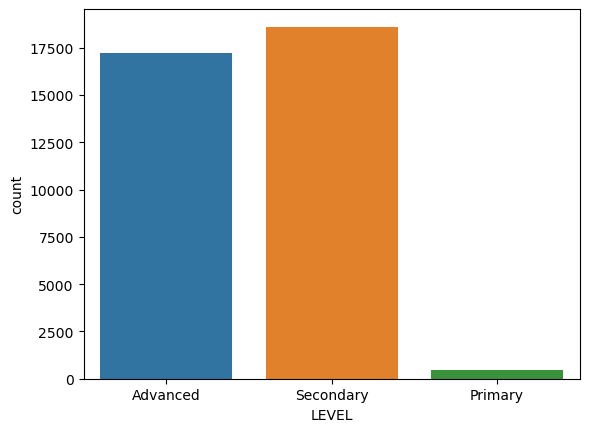

In [42]:
sns.countplot(x='LEVEL', data=df1)

In [51]:
country_counts = dict(df1.SOURCE_ID.value_counts())
country_mapping = {
    1: "Europe",
    2: "United States",
    3: "Brazil",
    4: "Mexico",
    5: "China",
    6: "Canada",
    7: "Australia",
    8: "South Africa",
    9: "India",
    10: "New Zealand",
    11: "Peru",
    12: "Remaining Countries"
}

# Replacing numbers with country names
replaced_counts = {country_mapping[int(number)]: count for number, count in country_counts.items()}
replaced_counts

{'Europe': 20086, 'United States': 13306, 'Mexico': 2147, 'India': 729}

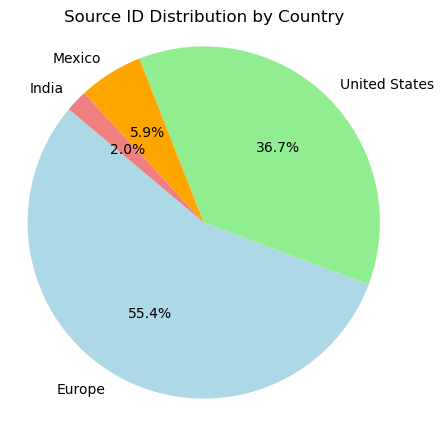

In [52]:
labels = replaced_counts.keys()
sizes = replaced_counts.values()
colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Source ID Distribution by Country')
plt.show()

In [54]:
# Assuming df is your DataFrame containing the data
# List of columns to check for numerical values
columns_to_check = ['WASTE_ID', 'SOURCE_ID', 'ORG_ID', 'WWTP_NAME', 'COUNTRY', 'CNTRY_ISO', 'QUAL_LOC', 'STATUS',
                    'POP_SERVED', 'QUAL_POP', 'WASTE_DIS', 'QUAL_WASTE', 'LEVEL', 'QUAL_LEVEL', 'DF', 'HYRIV_ID',
                    'RIVER_DIS', 'COAST_10KM', 'COAST_50KM', 'DESIGN_CAP', 'QUAL_CAP']

# Iterate over each column and attempt to convert to numeric
for col in columns_to_check:
    try:
        # Attempt to convert the column to numeric
        df1[col] = pd.to_numeric(df1[col])
        print(f"Numerical values detected in column '{col}'")
    except ValueError:
        print(f"No numerical values detected in column '{col}'")

# Now the columns that contain numerical values have been detected and converted to numeric data type

Numerical values detected in column 'WASTE_ID'
Numerical values detected in column 'SOURCE_ID'
Numerical values detected in column 'ORG_ID'
No numerical values detected in column 'WWTP_NAME'
No numerical values detected in column 'COUNTRY'
No numerical values detected in column 'CNTRY_ISO'
Numerical values detected in column 'QUAL_LOC'
No numerical values detected in column 'STATUS'
Numerical values detected in column 'POP_SERVED'
Numerical values detected in column 'QUAL_POP'
Numerical values detected in column 'WASTE_DIS'
Numerical values detected in column 'QUAL_WASTE'
No numerical values detected in column 'LEVEL'
Numerical values detected in column 'QUAL_LEVEL'
Numerical values detected in column 'DF'
Numerical values detected in column 'HYRIV_ID'
Numerical values detected in column 'RIVER_DIS'
Numerical values detected in column 'COAST_10KM'
Numerical values detected in column 'COAST_50KM'
Numerical values detected in column 'DESIGN_CAP'
Numerical values detected in column 'QUAL_

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36268 entries, 0 to 52713
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WASTE_ID    36268 non-null  int64  
 1   SOURCE_ID   36268 non-null  int64  
 2   ORG_ID      36268 non-null  int64  
 3   WWTP_NAME   36268 non-null  object 
 4   COUNTRY     36268 non-null  object 
 5   CNTRY_ISO   36268 non-null  object 
 6   QUAL_LOC    36268 non-null  int64  
 7   STATUS      36268 non-null  object 
 8   POP_SERVED  36268 non-null  int64  
 9   QUAL_POP    36268 non-null  int64  
 10  WASTE_DIS   36268 non-null  float64
 11  QUAL_WASTE  36268 non-null  int64  
 12  LEVEL       36268 non-null  object 
 13  QUAL_LEVEL  36268 non-null  int64  
 14  DF          36268 non-null  float64
 15  HYRIV_ID    36268 non-null  int64  
 16  RIVER_DIS   36268 non-null  float64
 17  COAST_10KM  36268 non-null  int64  
 18  COAST_50KM  36268 non-null  int64  
 19  DESIGN_CAP  36268 non-nul

In [56]:
numerical_col = []
for col in df1.columns:
    if df1[col].dtype != "object":
        numerical_col.append(col)
numerical_col = [col for col in numerical_col if not col.endswith("ID")]
numerical_col

['QUAL_LOC',
 'POP_SERVED',
 'QUAL_POP',
 'WASTE_DIS',
 'QUAL_WASTE',
 'QUAL_LEVEL',
 'DF',
 'RIVER_DIS',
 'COAST_10KM',
 'COAST_50KM',
 'DESIGN_CAP',
 'QUAL_CAP']

<Axes: xlabel='QUAL_LOC', ylabel='count'>

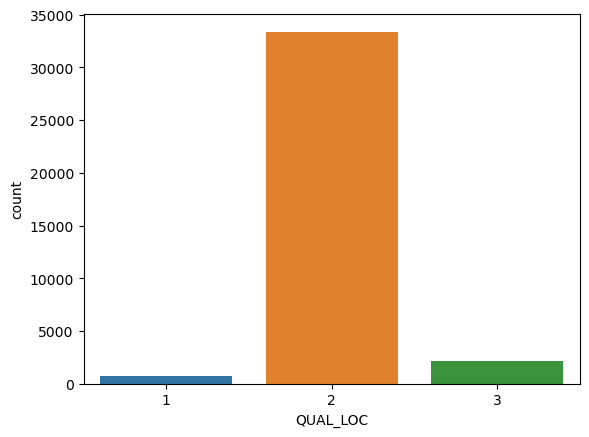

In [57]:
sns.countplot(x='QUAL_LOC', data=df1)

In [58]:
df1.describe()

,WASTE_ID,SOURCE_ID,ORG_ID,QUAL_LOC,POP_SERVED,QUAL_POP,WASTE_DIS,QUAL_WASTE,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
count,36268.000000,36268.000000,3.626800e+04,36268.000000,3.626800e+04,36268.000000,3.626800e+04,36268.000000,36268.000000,3.626800e+04,3.626800e+04,36268.000000,36268.0,36268.000000,3.626800e+04,36268.000000
mean,22606.578306,1.705277,1.091570e+10,2.039098,2.034957e+04,1.712419,5.553599e+03,2.084179,1.027076,4.785861e+04,4.222873e+07,140.437007,0.0,0.179001,2.071288e+04,1.553822
std,13047.719821,1.299507,1.684093e+10,0.278876,9.576498e+04,0.602898,3.395218e+04,1.427217,0.162308,7.199039e+05,2.463844e+07,885.901841,0.0,0.383358,1.162601e+05,0.497102
min,1.000000,1.000000,1.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,1.000000,1.004000e+00,2.001131e+07,0.001000,0.0,0.000000,0.000000e+00,1.000000
25%,11977.750000,1.000000,1.289796e+06,2.000000,1.100000e+03,1.000000,2.833235e+02,1.000000,1.000000,1.410302e+02,2.040075e+07,1.813000,0.0,0.000000,8.706420e+02,1.000000
50%,22827.500000,1.000000,1.343362e+06,2.000000,3.276000e+03,2.000000,8.177780e+02,1.000000,1.000000,6.381285e+02,2.058330e+07,6.301500,0.0,0.000000,3.785400e+03,2.000000
75%,32773.250000,2.000000,2.000098e+10,2.000000,1.070050e+04,2.000000,2.850323e+03,4.000000,1.000000,3.892234e+03,7.057304e+07,33.377500,0.0,0.000000,1.200000e+04,2.000000
max,52714.000000,9.000000,7.200001e+10,3.000000,4.283333e+06,3.000000,3.073754e+06,4.000000,2.000000,5.150393e+07,8.027614e+07,21855.440000,0.0,1.000000,1.120625e+07,2.000000


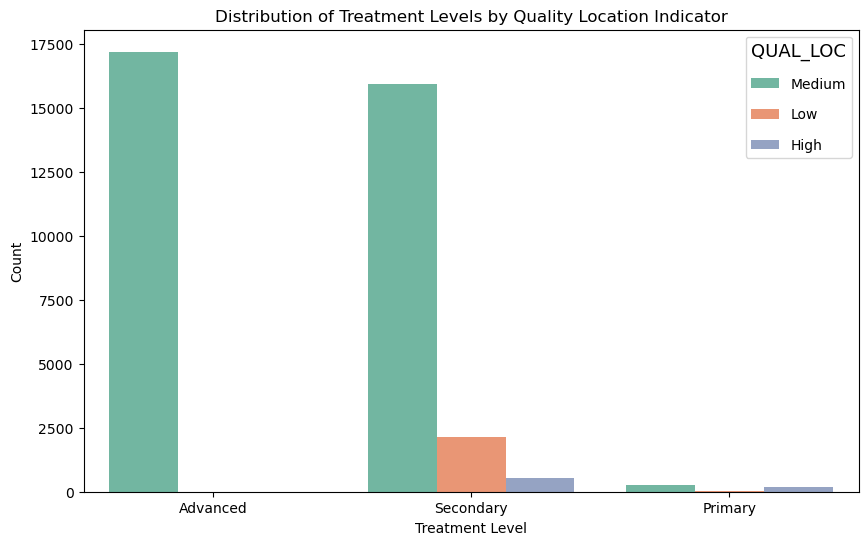

In [59]:
subset_df = df1[df1['QUAL_LOC'].isin([1, 2, 3])].copy()
subset_df['QUAL_LOC'] = subset_df['QUAL_LOC'].replace({1: 'High', 2: 'Medium', 3: 'Low'})

# Using sns.countplot with 'hue'
plt.figure(figsize=(10, 6))
sns.countplot(data=subset_df, x='LEVEL', hue='QUAL_LOC', palette='Set2')

plt.title('Distribution of Treatment Levels by Quality Location Indicator')
plt.xlabel('Treatment Level')
plt.ylabel('Count')
plt.legend(title='QUAL_LOC', title_fontsize='13', labelspacing=1.2)

plt.show()

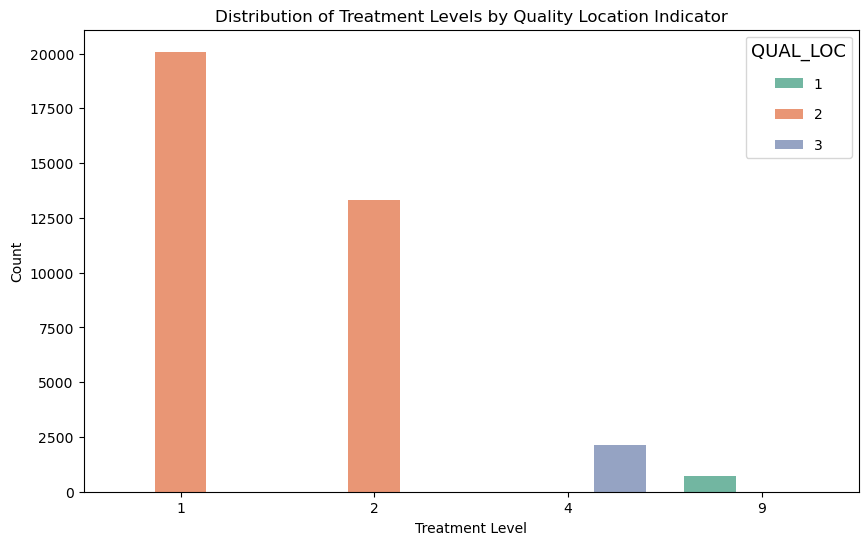

In [61]:
subset_df = df1[df1['QUAL_LOC'].isin([1, 2, 3])].copy()

# Using sns.countplot with 'hue'
plt.figure(figsize=(10, 6))
sns.countplot(data=subset_df, x='SOURCE_ID', hue='QUAL_LOC', palette='Set2')

plt.title('Distribution of Treatment Levels by Quality Location Indicator')
plt.xlabel('Treatment Level')
plt.ylabel('Count')
plt.legend(title='QUAL_LOC', title_fontsize='13', labelspacing=1.2)

plt.show()

<Axes: xlabel='DESIGN_CAP', ylabel='POP_SERVED'>

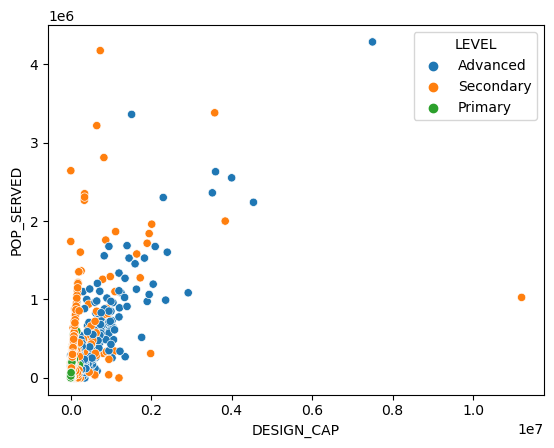

In [258]:
sns.scatterplot(x = df1.DESIGN_CAP, y = df1.POP_SERVED, hue = df1.LEVEL)

<Axes: xlabel='WASTE_DIS', ylabel='DESIGN_CAP'>

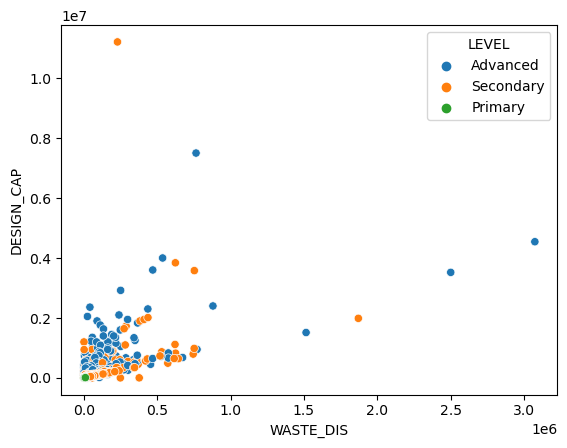

In [259]:
sns.scatterplot(x = df1.WASTE_DIS, y = df1.DESIGN_CAP, hue = df1.LEVEL)

In [260]:
df1.corr()

,WASTE_ID,SOURCE_ID,ORG_ID,QUAL_LOC,POP_SERVED,QUAL_POP,WASTE_DIS,QUAL_WASTE,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
WASTE_ID,1.000000,0.715032,0.585100,0.182253,0.029417,-0.217147,0.039980,-0.674289,0.081457,0.007798,0.791814,0.042354,NaN,-0.135791,-0.066812,-0.836120
SOURCE_ID,0.715032,1.000000,0.146972,-0.029756,0.125769,0.222532,0.072766,-0.325588,0.117318,-0.000480,0.477341,0.020054,NaN,-0.043485,-0.039202,-0.604670
ORG_ID,0.585100,0.146972,1.000000,-0.090874,-0.057923,-0.765859,0.010690,-0.492332,-0.108124,0.026619,0.745624,0.055492,NaN,-0.119312,-0.063171,-0.722055
QUAL_LOC,0.182253,-0.029756,-0.090874,1.000000,-0.078154,0.299422,-0.045545,-0.157006,0.299471,-0.005548,0.250531,-0.029285,NaN,0.091347,-0.028839,-0.156199
POP_SERVED,0.029417,0.125769,-0.057923,-0.078154,1.000000,0.091640,0.720599,-0.007478,-0.022574,-0.012928,-0.037902,0.041130,NaN,0.020170,0.699830,0.009508
QUAL_POP,-0.217147,0.222532,-0.765859,0.299422,0.091640,1.000000,0.002324,0.385720,0.228917,-0.035447,-0.588140,-0.070319,NaN,0.144112,0.045716,0.531439
WASTE_DIS,0.039980,0.072766,0.010690,-0.045545,0.720599,0.002324,1.000000,-0.035789,-0.012566,-0.010382,0.023791,0.067532,NaN,0.023003,0.617243,-0.036924
QUAL_WASTE,-0.674289,-0.325588,-0.492332,-0.157006,-0.007478,0.385720,-0.035789,1.000000,0.012895,-0.023648,-0.660375,-0.047418,NaN,0.177015,0.015066,0.653514
QUAL_LEVEL,0.081457,0.117318,-0.108124,0.299471,-0.022574,0.228917,-0.012566,0.012895,1.000000,-0.006990,0.036665,-0.016794,NaN,0.012506,-0.023028,-0.031390
DF,0.007798,-0.000480,0.026619,-0.005548,-0.012928,-0.035447,-0.010382,-0.023648,-0.006990,1.000000,0.028866,0.251533,NaN,-0.011928,-0.010696,-0.026983


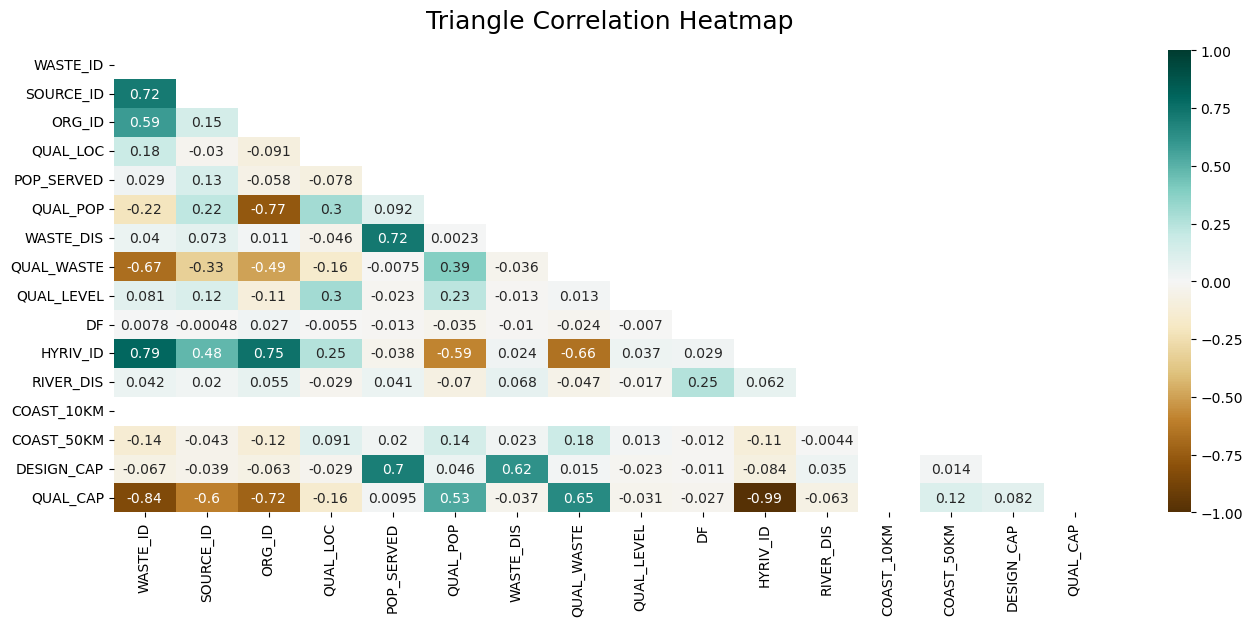

In [64]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df1.corr(), dtype=bool))
heatmap = sns.heatmap(df1.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
# from pydantic import BaseSettings # OLD
from ydata_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')

/Users/rishabkhuba/anaconda3/lib/python3.11/site-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [65]:
df1.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,QUAL_LOC,STATUS,POP_SERVED,QUAL_POP,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,LTU,2,Not Reported,1060,2,...,4,Advanced,1,2421.974,20228874,4.153,0,0,4600.0,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,LTU,2,Not Reported,87900,2,...,1,Advanced,1,2534.527,20261585,257.983,0,0,220000.0,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,LTU,2,Not Reported,12400,2,...,1,Advanced,1,1367.809,20243105,30.995,0,0,33000.0,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,LTU,2,Not Reported,2500,2,...,1,Secondary,1,2061.969,20247446,13.799,0,0,4357.0,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,LTU,2,Not Reported,1200,2,...,4,Secondary,1,209.549,20239330,0.405,0,0,1490.0,2


In [66]:
df1.drop(columns="CNTRY_ISO", inplace=True)

In [67]:
df1.head()

,WASTE_ID,SOURCE_ID,ORG_ID,WWTP_NAME,COUNTRY,QUAL_LOC,STATUS,POP_SERVED,QUAL_POP,WASTE_DIS,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,1,1,1140441,Akmenes aglomeracija,Lithuania,2,Not Reported,1060,2,148.213,4,Advanced,1,2421.974,20228874,4.153,0,0,4600.0,2
1,2,1,1140443,Alytaus m aglomeracija,Lithuania,2,Not Reported,87900,2,8797.904,1,Advanced,1,2534.527,20261585,257.983,0,0,220000.0,2
2,3,1,1140445,Anyksciu aglomeracija,Lithuania,2,Not Reported,12400,2,1959.285,1,Advanced,1,1367.809,20243105,30.995,0,0,33000.0,2
3,4,1,1140447,Ariogalos aglomeracija,Lithuania,2,Not Reported,2500,2,578.482,1,Secondary,1,2061.969,20247446,13.799,0,0,4357.0,2
4,5,1,1140449,Baisogalos aglomeracija,Lithuania,2,Not Reported,1200,2,167.788,4,Secondary,1,209.549,20239330,0.405,0,0,1490.0,2


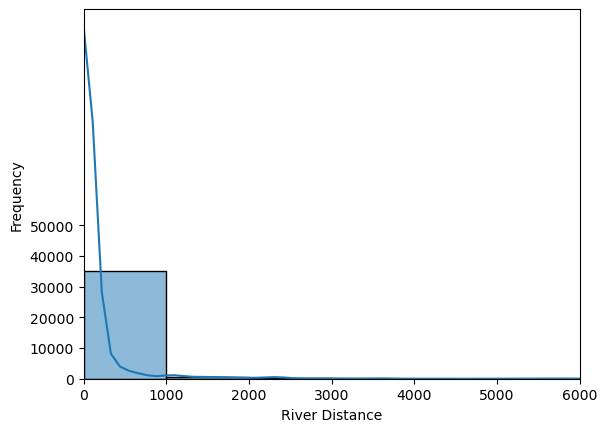

In [100]:
sns.histplot(df1.RIVER_DIS, kde = True, bins=range(int(min(df1.RIVER_DIS)) - (int(min(df1.RIVER_DIS)) % 1000), 
                                   int(max(df1.RIVER_DIS)) + 1000, 1000), 
         alpha=0.5, edgecolor='black')

plt.xlim(0, 5000)  # Setting x-axis limit to 5000
plt.xticks(range(0, 6001, 1000))  # Adjusting x-ticks to match the new x-axis limit
plt.yticks(range(0, 50001, 10000))
plt.xlabel('River Distance')
plt.ylabel("Frequency")
plt.show()



/Users/rishabkhuba/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Population Served')

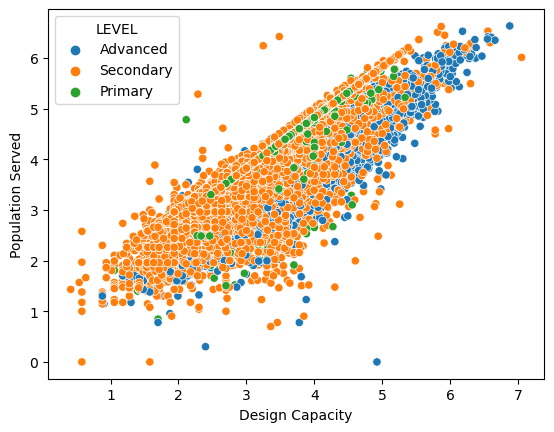

In [106]:
sns.scatterplot(x = np.log10(df1.DESIGN_CAP), y = np.log10(df1.POP_SERVED), hue = df1.LEVEL)
plt.xlabel("Design Capacity")
plt.ylabel("Population Served")

In [108]:
df1.COAST_50KM.unique()

array([0, 1])

In [109]:
max(df1.RIVER_DIS)

21855.44